# Import các libraries cần thiết và load data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
random.seed(0) # please do not remove this line
%matplotlib inline

In [2]:
data = np.genfromtxt('advertising.csv', 
                     dtype=None, 
                     delimiter=',', 
                     skip_header=1) 
features = data[:, :3]
prices = data[:, 3]

intercept = np.ones((features.shape[0], 1))
features = np.concatenate((intercept, features), axis=1)

print(features.shape, prices.shape)
print(prices)

(200, 4) (200,)
[22.1 10.4 12.  16.5 17.9  7.2 11.8 13.2  4.8 15.6 12.6 17.4  9.2 13.7
 19.  22.4 12.5 24.4 11.3 14.6 18.  17.5  5.6 20.5  9.7 17.  15.  20.9
 18.9 10.5 21.4 11.9 13.2 17.4 11.9 17.8 25.4 14.7 10.1 21.5 16.6 17.1
 20.7 17.9  8.5 16.1 10.6 23.2 19.8  9.7 16.4 10.7 22.6 21.2 20.2 23.7
  5.5 13.2 23.8 18.4  8.1 24.2 20.7 14.  16.  11.3 11.  13.4 18.9 22.3
 18.3 12.4  8.8 11.  17.   8.7  6.9 14.2  5.3 11.  11.8 17.3 11.3 13.6
 21.7 20.2 12.  16.  12.9 16.7 14.   7.3 19.4 22.2 11.5 16.9 16.7 20.5
 25.4 17.2 16.7 23.8 19.8 19.7 20.7 15.   7.2 12.   5.3 19.8 18.4 21.8
 17.1 20.9 14.6 12.6 12.2  9.4 15.9  6.6 15.5  7.  16.6 15.2 19.7 10.6
  6.6 11.9 24.7  9.7  1.6 17.7  5.7 19.6 10.8 11.6  9.5 20.8  9.6 20.7
 10.9 19.2 20.1 10.4 12.3 10.3 18.2 25.4 10.9 10.1 16.1 11.6 16.6 16.
 20.6  3.2 15.3 10.1  7.3 12.9 16.4 13.3 19.9 18.  11.9 16.9  8.  17.2
 17.1 20.   8.4 17.5  7.6 16.7 16.5 27.  20.2 16.7 16.8 17.6 15.5 17.2
  8.7 26.2 17.6 22.6 10.3 17.3 20.9  6.7 10.8 11.9  5.9 19.6 1

# Huấn luyện và nhận định

In [3]:
n = 4                  # size of individual (chromosome); 3 coefficients and 1 bias
m = 600                # size of population
n_generations = 100   # number of generations
losses = []            # để vẽ biểu đồ quá trình tối ưu
individuals = []       # chứa các tham số trong quá trình training (theta)

def generate_random_value(bound = 10):
    return (random.random() - 0.5)*bound

def compute_loss(individual):
    # your code here
    
    return loss


def compute_fitness(individual):
    loss = compute_loss(individual)
    fitness = 1 / (loss + 1)
    return fitness

def create_individual():
    return [generate_random_value() for _ in range(n)]

def crossover(individual1, individual2, crossover_rate = 0.9):
    individual1_new = individual1.copy()
    individual2_new = individual2.copy()
    
    for i in range(n):
        if random.random() < crossover_rate:
            individual1_new[i] = individual2[i]
            individual2_new[i] = individual1[i]            
    
    return individual1_new, individual2_new

def mutate(individual, mutation_rate = 0.05):
    individual_m = individual.copy()
    
    for i in range(n):
        if random.random() < mutation_rate:
            individual_m[i] = generate_random_value()
        
    return individual_m

def selection(sorted_old_population):    
    index1 = random.randint(0, m-1)    
    while True:
        index2 = random.randint(0, m-1)    
        if (index2 != index1):
            break
            
    individual_s = sorted_old_population[index1]
    if index2 > index1:
        individual_s = sorted_old_population[index2]
    
    return individual_s 

def create_new_population(old_population, elitism=2, gen=1):
    sorted_population = sorted(old_population, key=compute_fitness)
        
    if gen%10 == 0:
        losses.append(compute_loss(sorted_population[m-1]))
        print("Best loss:", compute_loss(sorted_population[m-1]), sorted_population[m-1])
    
    new_population = []
    while len(new_population) < m-elitism:
        # selection
        individual_s1 = selection(sorted_population)
        individual_s2 = selection(sorted_population) # duplication
        
        # crossover
        individual_c1, individual_c2 = crossover(individual_s1, individual_s2)
        
        # mutation
        individual_m1 = mutate(individual_c1)
        individual_m2 = mutate(individual_c2)
        
        new_population.append(individual_m1)
        new_population.append(individual_m2)            
    
    for ind in sorted_population[m-elitism:]:
        new_population.append(ind.copy())
    
    return new_population


In [ ]:
population = [create_individual() for _ in range(m)]
for i in range(n_generations):
    population = create_new_population(population, 2, i)

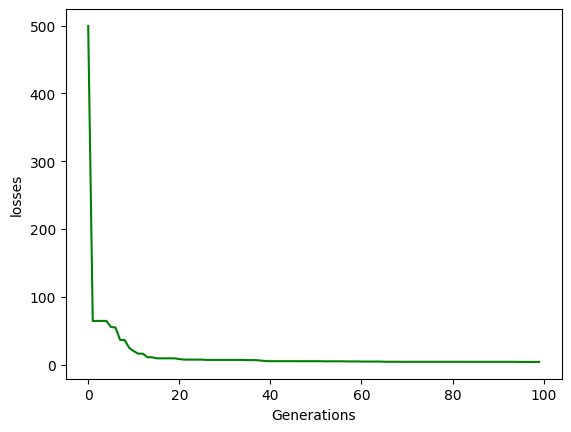

In [7]:
import matplotlib.pyplot as plt

plt.plot(losses[:200], c='green')
plt.xlabel('Generations')
plt.ylabel('losses')
plt.show()

[4.9962006103448235, 0.044410052412586776, 0.17399073660510522, -0.013129404272822498]


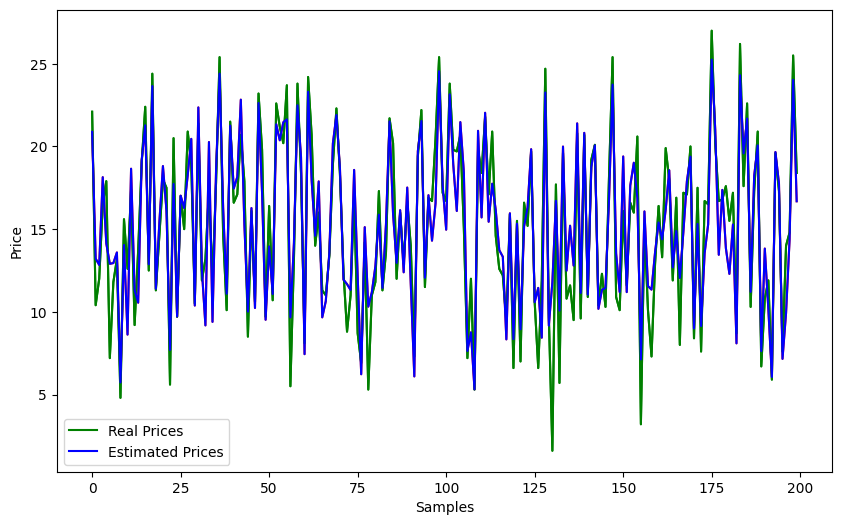

In [8]:
# visualization of ground truth and predict value
sorted_population = sorted(population, key=compute_fitness)
print(sorted_population[-1])
theta = np.array(sorted_population[-1])

estimated_prices = []
for feature in features:        
    estimated_price = sum(c*x for x, c in zip(feature, theta))
    estimated_prices.append(estimated_price)
         
fig, ax = plt.subplots(figsize=(10, 6))
plt.plot(prices, c='green')    
plt.plot(estimated_prices, c='red')
plt.xlabel('Samples')
plt.ylabel('Price')
plt.plot(prices, c='green', label='Real Prices')
plt.plot(estimated_prices, c='blue', label='Estimated Prices')
plt.legend()
plt.show()